In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df=pd.read_csv('/content/Social_Network_Ads.csv')
df.head()
df.info()
df.sample(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
157,29,75000,0
242,50,88000,1
299,46,117000,1
200,35,39000,0
10,26,80000,0
228,40,72000,0


In [2]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

X_train.shape,X_test.shape

((280, 2), (120, 2))

Standard Scaler using SckitLearn
We see X_Train


In [3]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [4]:
X_train_sc

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [5]:
sc.mean_

array([3.78642857e+01, 6.98071429e+04])

In [6]:
X_train_sc=pd.DataFrame(X_train_sc,columns=X_train.columns)
X_test_sc=pd.DataFrame(X_test_sc,columns=X_test.columns)

In [7]:
np.round(X_train_sc.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling

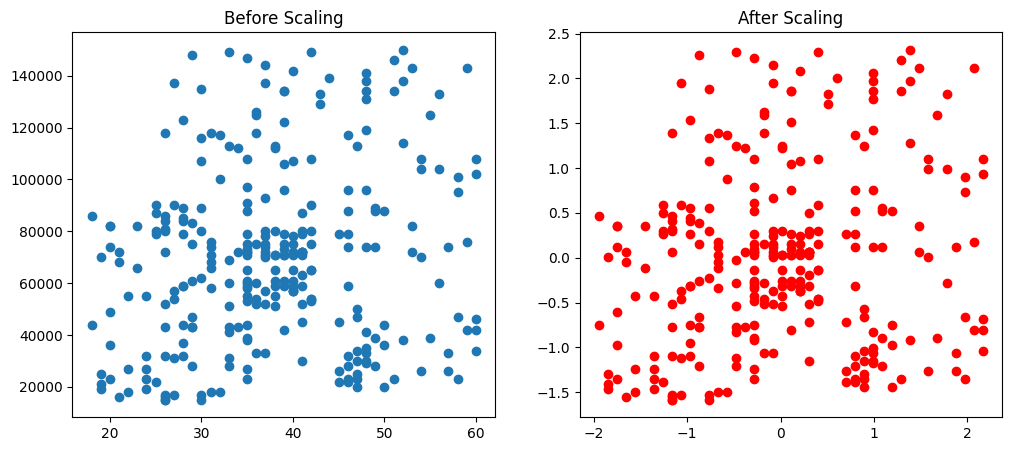

In [8]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_sc['Age'],X_train_sc['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

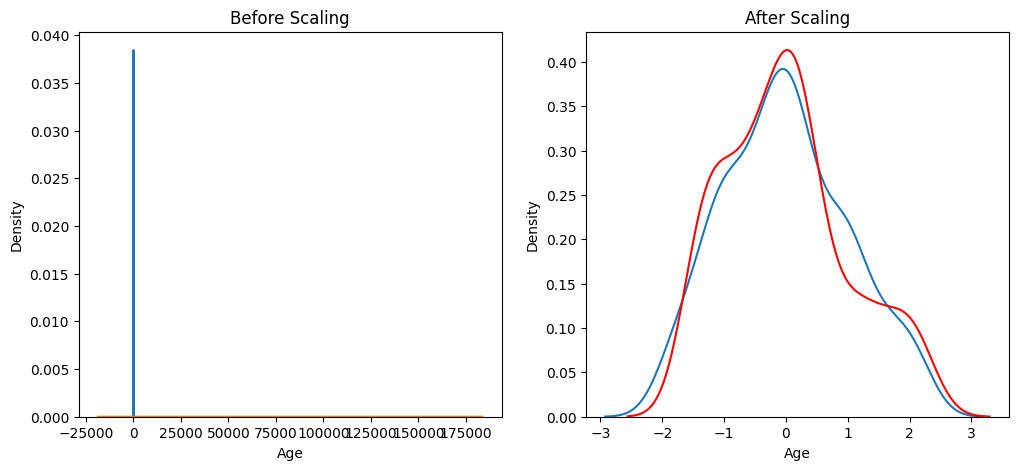

In [9]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
#before scaling

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)
#after scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_sc['Age'],ax=ax2)
sns.kdeplot(X_train_sc['EstimatedSalary'],ax=ax2,color='red')
plt.show()

#Normalization

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('/content/Wine dataset.csv',usecols=[0,1,2])
df.columns=['Class label','Alcohol','Malic acid']
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [12]:
df.info()
df.shape
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


<Axes: xlabel='Alcohol', ylabel='Density'>

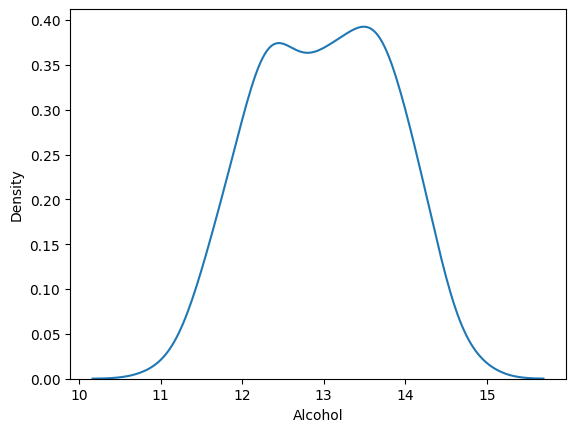

In [13]:
sns.kdeplot(df['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

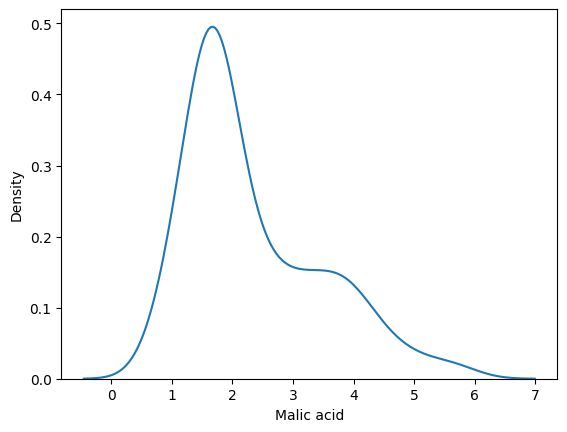

In [14]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

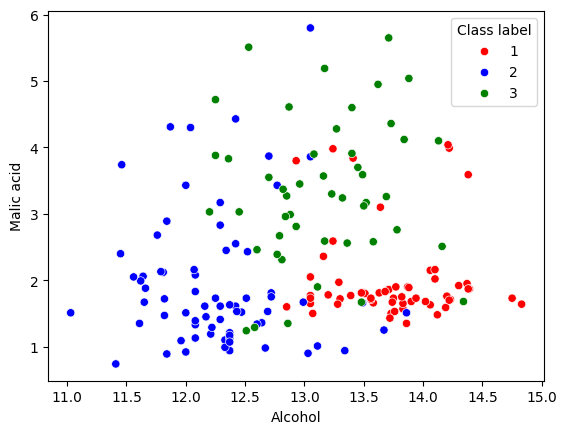

In [15]:
color_dict={1:'red',3:'green',2:'blue'}
sns.scatterplot(x=df['Alcohol'], y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [16]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [17]:
X_train,X_test,y_train,y_test=train_test_split(df.drop('Class label',axis=1),df['Class label'],test_size=0.3,random_state=0)

X_train,X_test

(     Alcohol  Malic acid
 22     13.71        1.86
 108    12.22        1.29
 175    13.27        4.28
 145    13.16        3.57
 71     13.86        1.51
 ..       ...         ...
 103    11.82        1.72
 67     12.37        1.17
 117    12.42        1.61
 47     13.90        1.68
 172    14.16        2.51
 
 [124 rows x 2 columns],
      Alcohol  Malic acid
 54     13.74        1.67
 151    12.79        2.67
 63     12.37        1.13
 55     13.56        1.73
 123    13.05        5.80
 121    11.56        2.05
 7      14.06        2.15
 160    12.36        3.83
 106    12.25        1.73
 90     12.08        1.83
 141    13.36        2.56
 146    13.88        5.04
 5      14.20        1.76
 98     12.37        1.07
 168    13.58        2.58
 80     12.00        0.92
 33     13.76        1.53
 18     14.19        1.59
 61     12.64        1.36
 51     13.83        1.65
 66     13.11        1.01
 37     13.05        1.65
 4      13.24        2.59
 104    12.51        1.73
 60     12.

In [18]:
sc=MinMaxScaler()
sc.fit(X_train)
X_train_sc=sc.transform(X_train)
X_test_sc=sc.transform(X_test)

In [19]:
df=pd.DataFrame(X_train_sc,columns=X_train.columns)
df

,Alcohol,Malic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


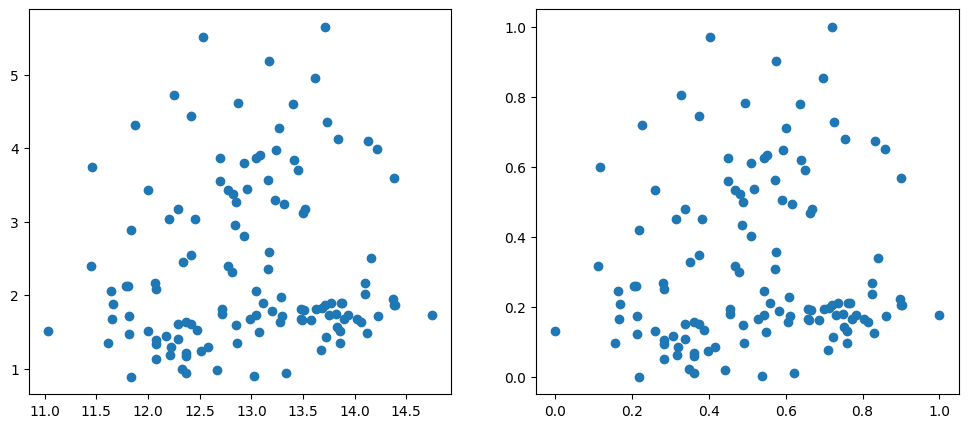

In [20]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train['Malic acid'])
ax2.scatter(X_train_sc[:,0],X_train_sc[:,1])

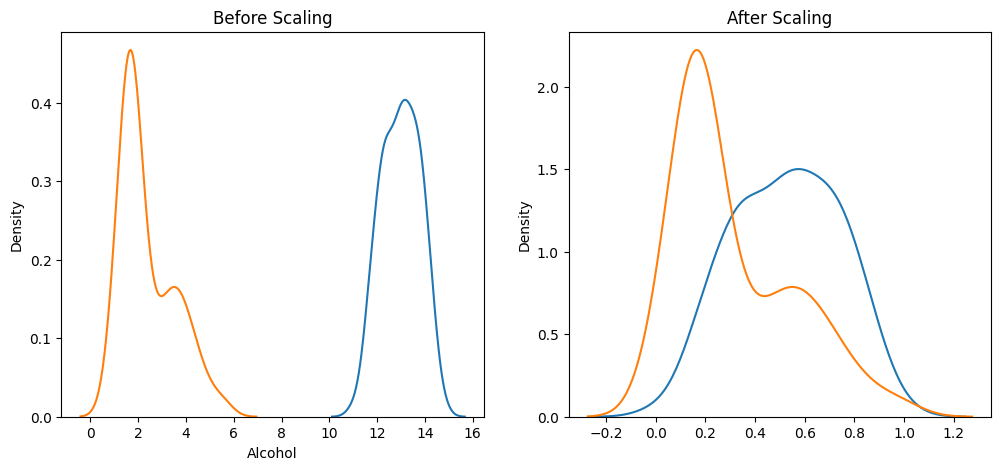

In [21]:
fig, (ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# Before Scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'],ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

# After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_sc[:,0],ax=ax2)
sns.kdeplot(X_train_sc[:,1],ax=ax2)
plt.show()